## Hypothesis Testing: Two sample

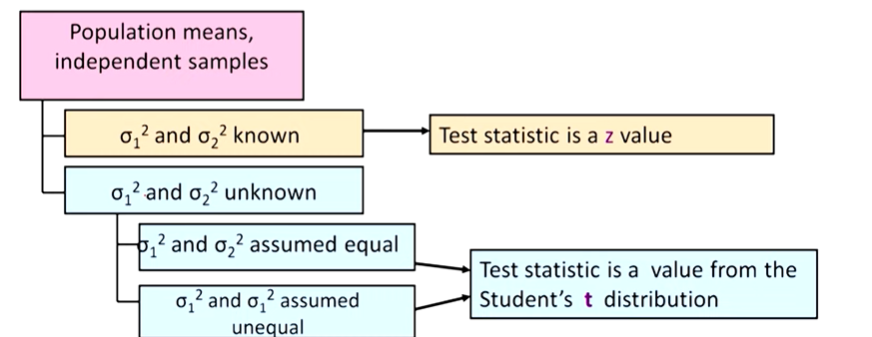

**Ques**
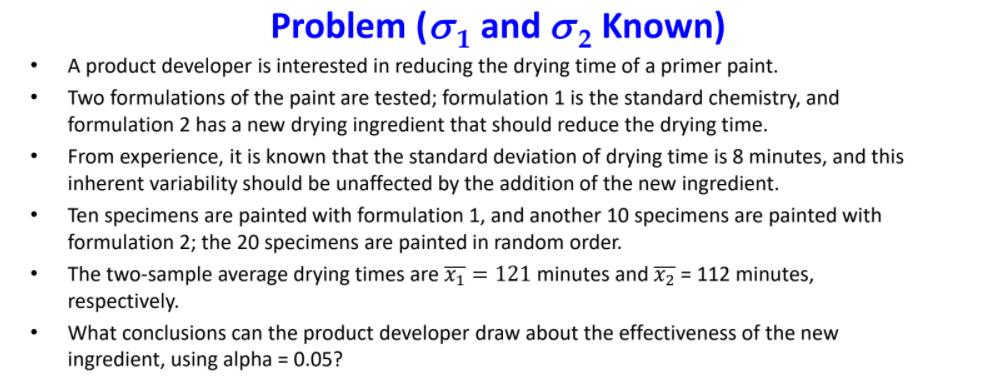

**Sol**
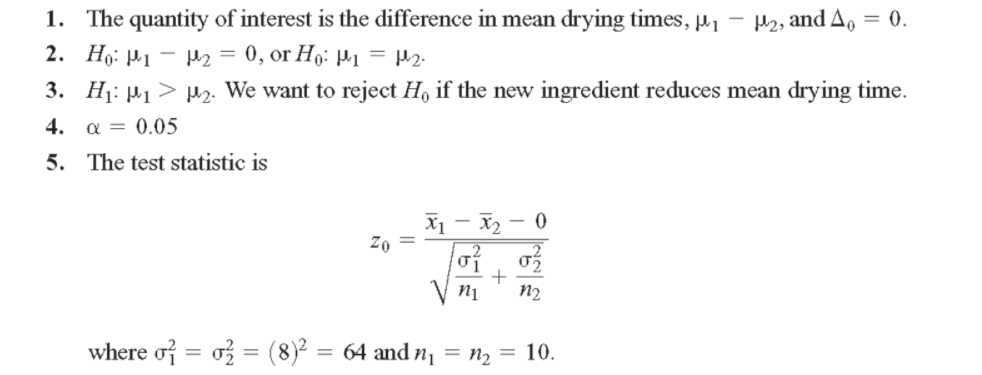
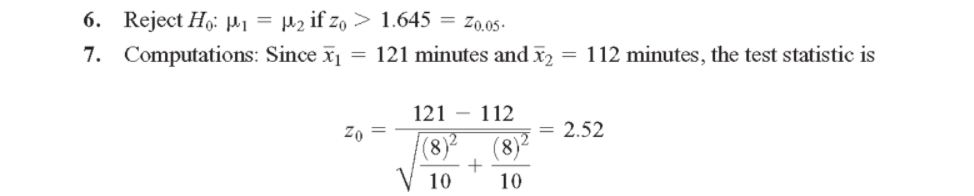
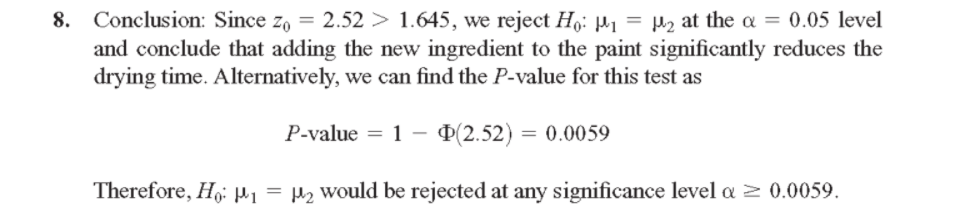

In [2]:
import pandas as pd
import numpy as np
import math
from scipy import stats

In [8]:
def z_and_p(x1,x2,sigma1,sigma2,n1,n2):
    z = (x1-x2)/(math.sqrt(((sigma1**2)/n1)+((sigma2**2)/n2)))
    if(z<0):
        p = stats.norm.cdf(z)
    else:
        p = 1-stats.norm.cdf(z)
        print(z,p)

In [9]:
z_and_p(121,112,8,8,10,10)

2.5155764746872635 0.00594189462107364


**Ques**
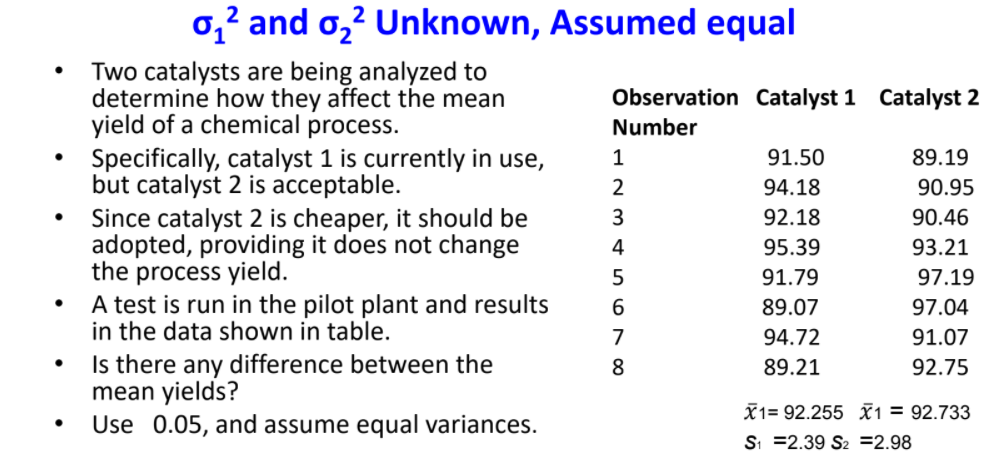

**Sol**

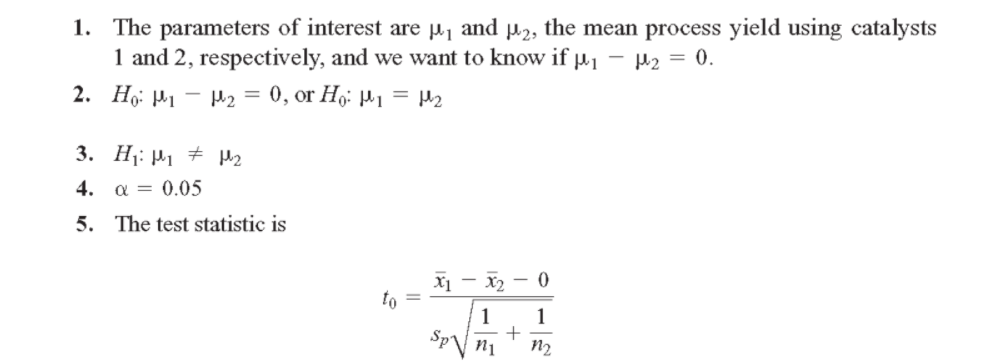
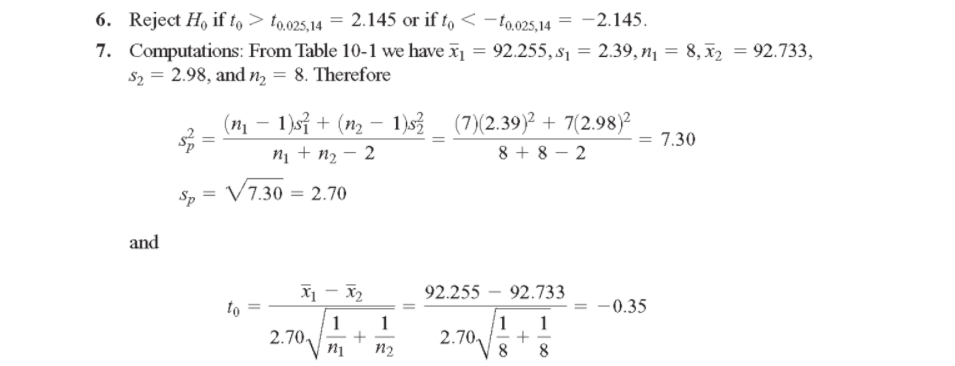
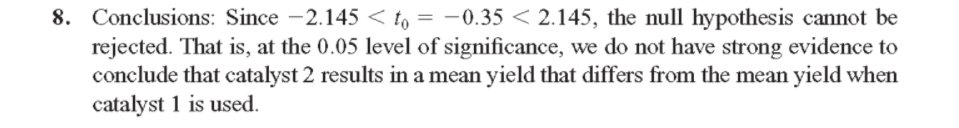

In [10]:
a = [89.19,90.95,90.46,93.21,97.19,97.04,91.07,92.75]

b = [91.5,94.18,92.18,95.39,91.79,89.07,94.72,89.21]

In [11]:
stats.ttest_ind(a,b,equal_var = True)

Ttest_indResult(statistic=0.3535908643461798, pvalue=0.7289136186068217)

In [12]:
stats.t.ppf(0.025,14)

-2.1447866879169277

**Ques**
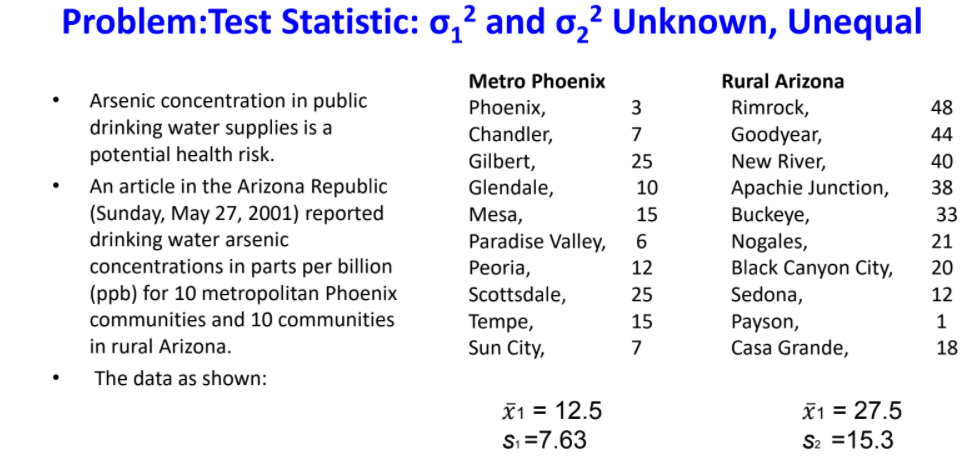

**Sol**
We wish to determine it there is any difference in mean arsenic concentrations between metropolitan Phoenix communities and communities in rural Arizona.
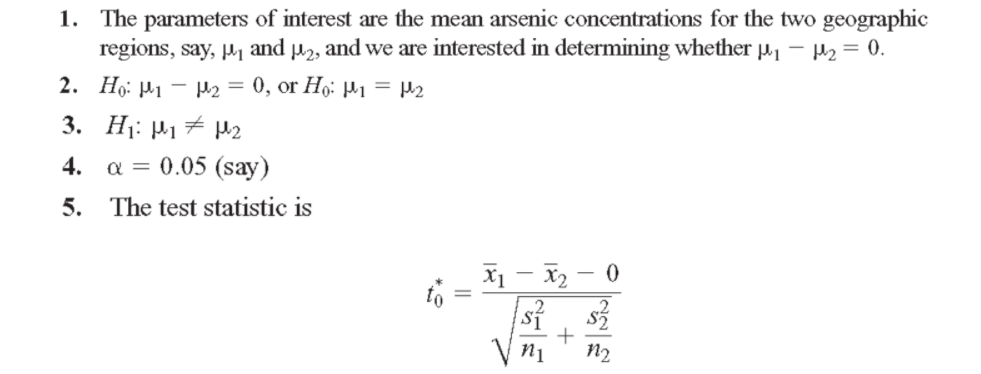
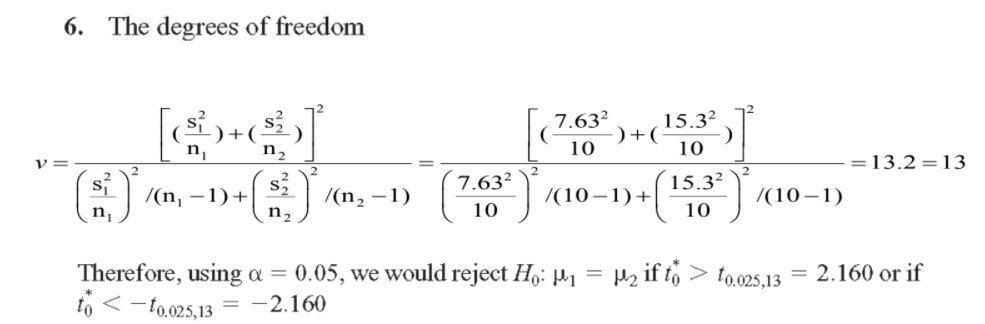
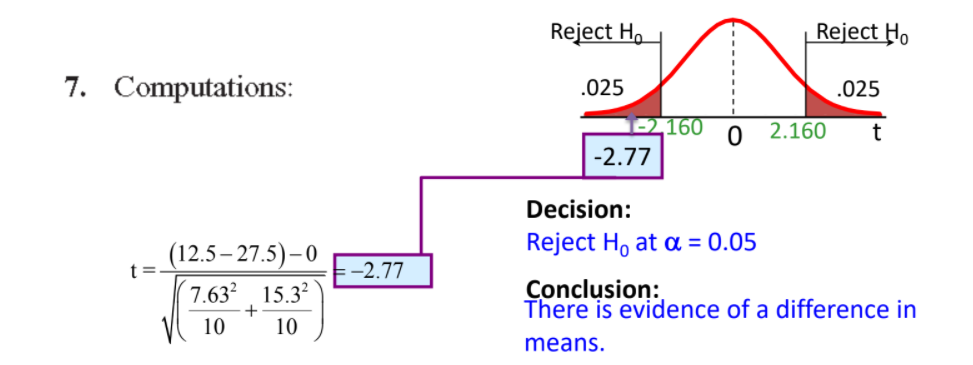
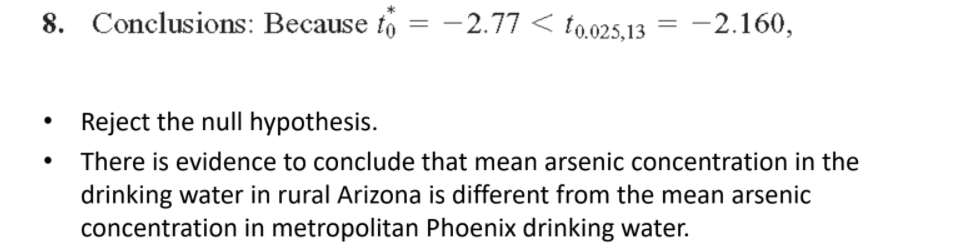

In [13]:
stats.t.ppf(0.025,13)

-2.160368656461013

In [15]:
metro = [3,7,25,10,15,6,12,25,15,7]
rural = [48,44,40,38,33,21,20,12,1,18]

stats.ttest_ind(metro,rural,equal_var =False)

Ttest_indResult(statistic=-2.7669395785560558, pvalue=0.015827284816100885)

## Dependent Samples

**Ques**
- An article in the Journal of Strain Analysis (1983, Vol. 18, No. 2) compares several methods for predicting the shear strength for steel plate girders.
- Data for two of these methods, the Karlsruhe and Lehigh procedures, when applied to nine specific girders, are shown in Table .
- We wish to determine whether there is any difference (on the average) between the two methods.

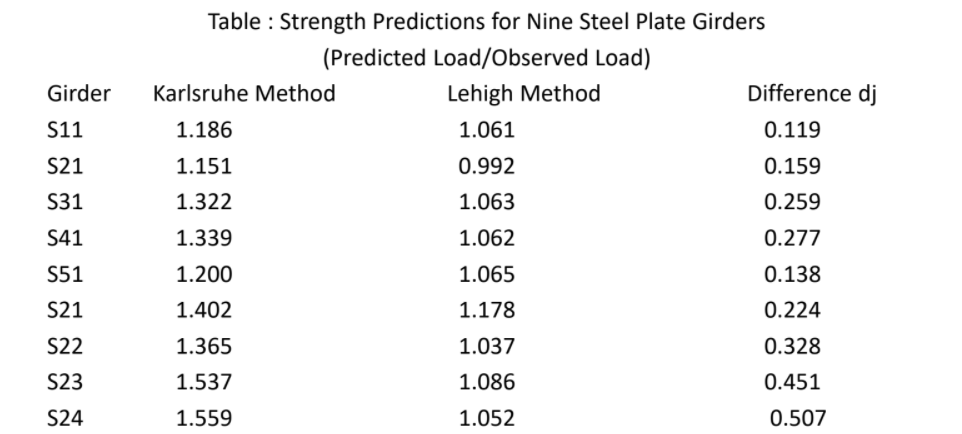

**Sol**

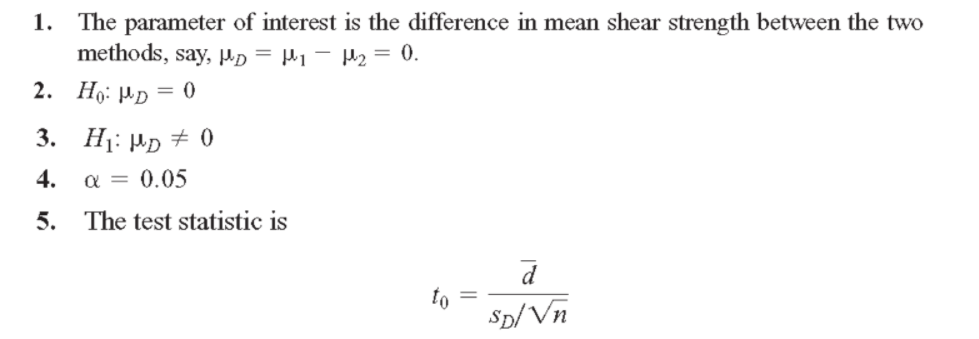

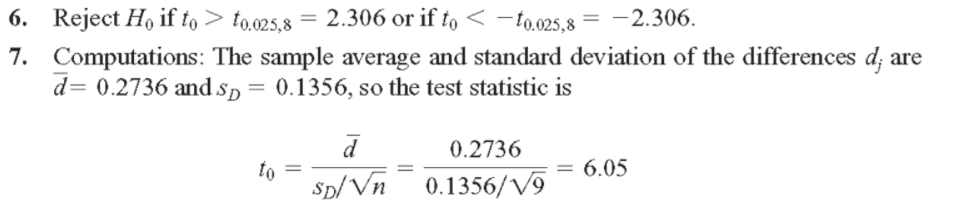

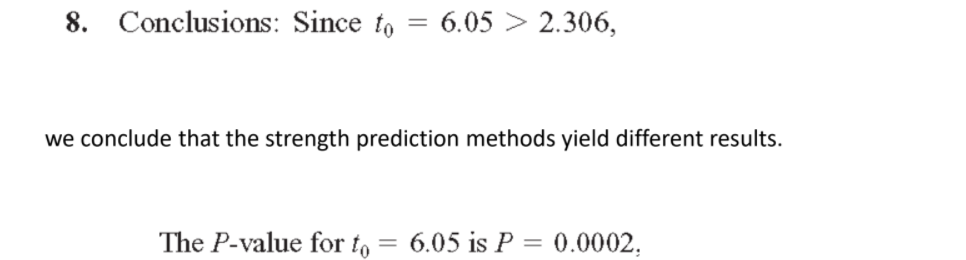

In [18]:
KARL = [1.186,1.151,1.322,1.339,1.200,1.402,1.365,1.537,1.559]
LEH = [1.061,0.992,1.063,1.062,1.065,1.178,1.037,1.086,1.052]

In [19]:
stats.ttest_rel(KARL,LEH)

Ttest_relResult(statistic=6.0819394375848255, pvalue=0.00029529546278604066)

## Inferences About the Difference Between Two Population Proportions

**Ques**
- Extracts of St. John’s Wort are widely used to treat depression.
- An article in the April 18, 2001 issue of the Journal of the American Medical Association (“Effectiveness of St. John’s Worton Major Depression: A Randomized Controlled Trial”) compared the efficacy of a standard extract of St. John’s Wort with a placebo in 200 outpatients diagnosed with major depression.
- Patients were randomly assigned to two groups; one group received the St. John’s Wort, and the other received the placebo.
- After eight weeks, 19 of the placebo-treated patients showed improvement, whereas 27 of those treated with St. John’s Wort improved.
- Is there any reason to believe that St. John’s Wort is effective in treating major depression? Use 0.05.

**Sol**
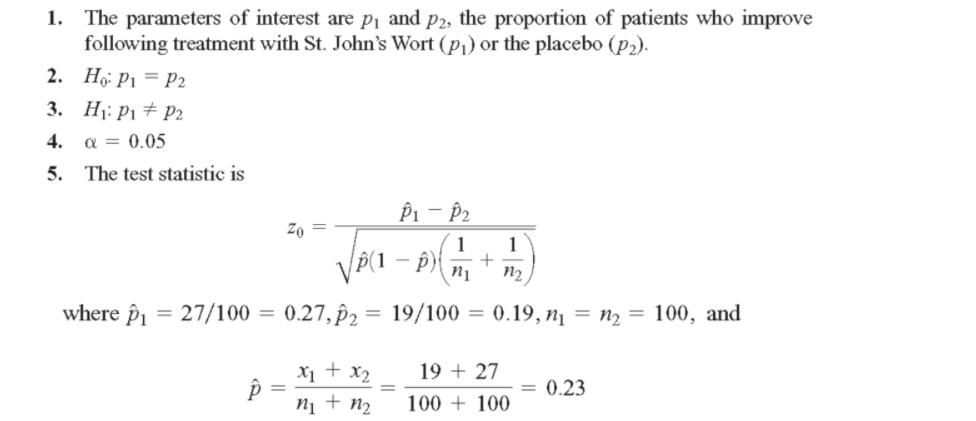
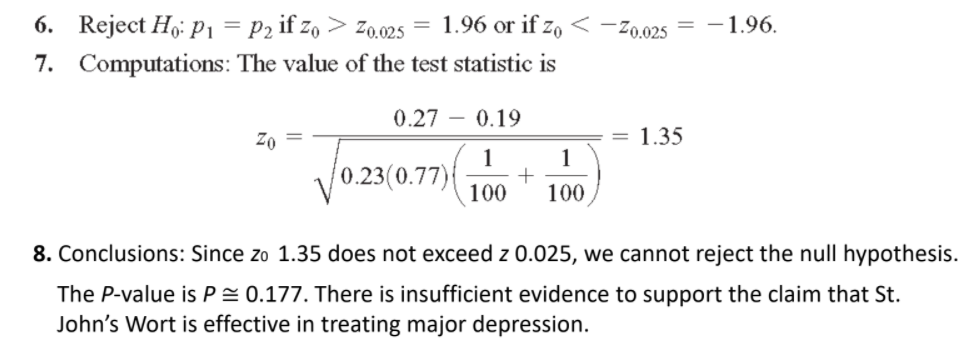

In [23]:
def two_samp_propotion(p1,p2,n1,n2):
    p_pool = ((p1*n2)+(p2*n1))/(n1 + n2)
    x = (p_pool*(1-p_pool)*((1/n1) + (1/n2)))
    s = math.sqrt(x)
    z = (p1-p2)/s
    if (z<0):
        p_val = stats.norm.cdf(z)
    else:
        p_val = 1 - stats.norm.cdf(z)
    return z,p_val*2

In [26]:
two_samp_propotion(0.27,0.19,100,100)

(1.3442056254198995, 0.17888190308175567)

In [28]:
stats.norm.cdf(1.3442056254198995)

0.9105590484591222

## Hypothesis Tests for Two Variances

**Ques**

- A company manufactures impellers for use in jet-turbine engines.
- One of the operations involves grinding a particular surface finish on a titanium alloy component.
- Two different grinding processes can be used, and both processes can produce parts at identical mean surface roughness.
- The manufacturing engineer would like to select the process having the least variability in surface roughness.
- A random sample of n1 =11 parts from the first process results in a sample standard deviation s1 = 5.1 micro inches, and a random sample of n2 = 16 parts from the second process results in a sample standard deviation of s2 = 4.7 micro inches.
- We will find a 90% confidence interval on the ratio of the two standard deviations.

**Sol**

- Form the hypothesis test:
   - H0: σ1 = σ2 (there is no difference between variances)
   - H1 σ1 ≠ σ2 (there is a difference between variances)
- Find the F critical values for alpha = 10/2: <br>

Degrees of Freedom:
- Numerator
  - n1 – 1 = 11 – 1 = 10 d.f.
- Denominator:
  -  n2 – 1 = 16 – 1 = 15 d.f.
  
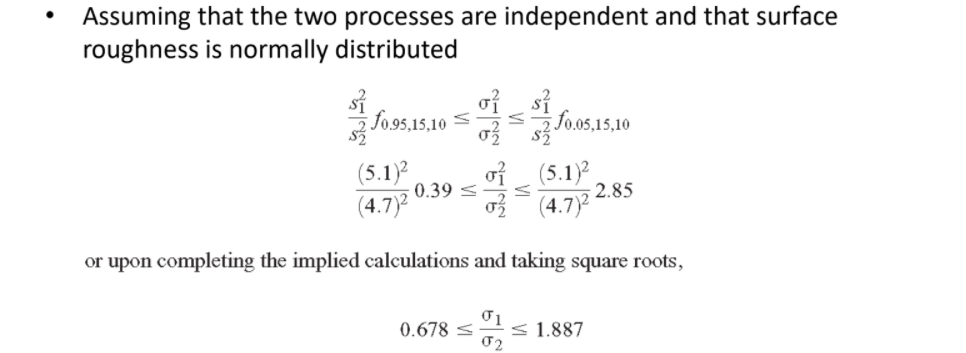
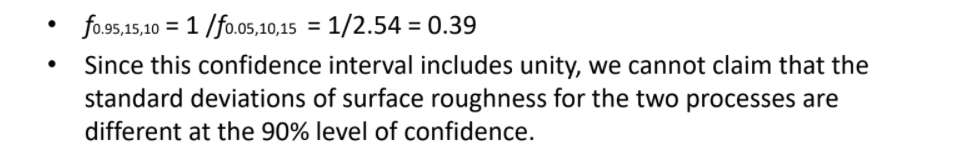


In [29]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import scipy

In [30]:
scipy.stats.f.ppf(q=1-0.05, dfn = 15,dfd = 10)

2.8450165269958436

In [32]:
scipy.stats.f.ppf(q = 0.05,dfn = 15,dfd = 10)

0.3931252536255495

## F Test

In [34]:
import numpy as np

X = [3,7,25,10,15,6,12,25,15,7]
Y = [48,44,40,38,33,21,20,12,1,18]

In [35]:
F = np.var(X)/np.var(Y)
dfn = len(X) -1
dfd = len(Y) -1

In [40]:
p_value = scipy.stats.f.cdf(F,dfn,dfd)
p_value

0.024680183438910465

## Determining the Sample Size for a Hypothesis Test About a Population Mean

**Ques**
-  Let’s assume that the manufacturing company makes the following statements about the allowable probabilities for the Type I and Type II errors:
- If the mean diameter is m = 12 mm, I am willing to risk an  = .05 probability of rejecting H0
- If the mean diameter is 0.75 mm over the specification (m = 12.75), I am willing to risk a b = .10 probability of not rejecting H0.

**Sol**
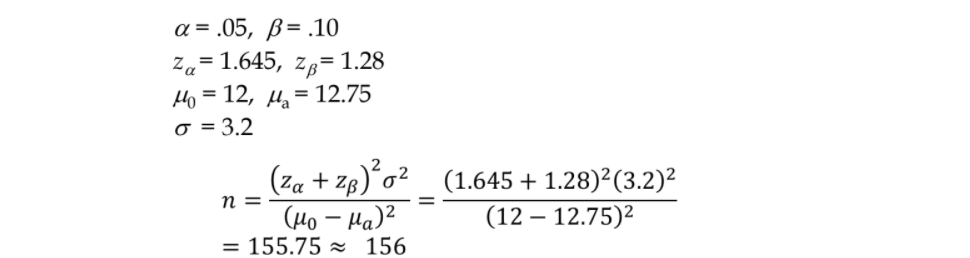

In [42]:
def sample_size(alpha,beta,mu1,mu2,sigma):
    z1 = -1*stats.norm.ppf(alpha)
    z2 = -1*stats.norm.ppf(beta)
    n = (((z1+z2)**2)*(sigma**2))/((mu1-mu2)**2)
    print(n)

In [43]:
sample_size(0.05,0.1,12,12.75,3.2)

155.900083325938
